In [4]:

###############################################################################
###############################################################################
#***************DATA PREPARATION AND CLEANING**********************************
###############################################################################
###############################################################################

import os
import pandas as pd
import numpy as np



df = pd.read_excel('2010to2018.xlsx')

#print the column names
print (df.columns)
df.head()
df.tail()
df.isna()
#delete columns NA or invalid data (since there are few)
df=df.dropna(how='all', axis=1)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')


In [8]:
#new columns names
dffinal = df.rename(columns={'Unnamed: 0': 'Date', 'Unnamed: 1': 'flightN','Unnamed: 3': 'AircraftType','Unnamed: 4': 'AircraftReg','Unnamed: 5':'OperationType','Unnamed: 6':'Departure' })
dffinal = dffinal.rename(columns={'Unnamed: 7': 'Arrival', 'Unnamed: 8': 'EstimTD','Unnamed: 9': 'ActualTD','Unnamed: 10': 'EstimTA','Unnamed: 11':'ActualTA','Unnamed: 12':'DepartDiff' })
dffinal = dffinal.rename(columns={'Unnamed: 13': 'ArrivalDiff', 'Unnamed: 15': 'AirbornH','Unnamed: 16': 'BlockH','Unnamed: 17': 'Passengers','Flight Statistics Report': 'Arrival'})

#Detect missing values in an Index and nulls
dffinal.isna().sum()
dffinal.isnull().sum()

# dropping NA value observations 
dffinal = dffinal.dropna(how='any',axis=0)

#delete column names by default on
dffinal=dffinal.drop(df.index[6], inplace=False)

#split and convertion to datetime Date
dffinal['Date'] = pd.to_datetime(dffinal['Date'], format='%d%b%y', utc=True)
dffinal['Year'] = pd.DatetimeIndex(dffinal['Date']).year
dffinal['Month'] = pd.DatetimeIndex(dffinal['Date']).month
dffinal['Day'] = pd.DatetimeIndex(dffinal['Date']).day
dffinal['Weekday'] = dffinal['Date'].dt.day_name
dffinal['Weekday_num'] = dffinal['Date'].dt.dayofweek


#split STD
dffinal['HEstimTD'] = pd.DatetimeIndex(dffinal['EstimTD']).hour
dffinal['mtsEstimTD'] = pd.DatetimeIndex(dffinal['EstimTD']).minute

#split ATD
dffinal['HActualTD'] = pd.DatetimeIndex(dffinal['ActualTD']).hour
dffinal['mtsActualTD'] = pd.DatetimeIndex(dffinal['ActualTD']).minute

#split STA
dffinal['EstimTA'] = dffinal['EstimTA'].str.replace('24:','00:')
dffinal['HEstimTA'] = pd.DatetimeIndex(dffinal['EstimTA']).hour
dffinal['mtsEstimTA'] = pd.DatetimeIndex(dffinal['EstimTA']).minute

#split ATA
dffinal['ActualTA'] = dffinal['ActualTA'].str.replace('24:','00:')
#dffinal['ActualTA'] = pd.to_datetime(dffinal['ActualTA'], format='%H:%m', utc=True)
dffinal['HActualTA'] = pd.DatetimeIndex(dffinal['ActualTA']).hour
dffinal['mtsActualTA'] = pd.DatetimeIndex(dffinal['ActualTA']).minute

dffinal.head()

#sort date
dffinal=dffinal.sort_values(by=['Date'])

#evaluation of negative of positive sign in string DepartDiff
dffinal['stateflightDepartDiff']=dffinal['DepartDiff'].str.contains('-')
#remane true and false per Early or delayed flight
dffinal['stateflightDepartDiff']= np.where (dffinal['stateflightDepartDiff'], 'Early', 'Delayed')
#split minutes and hours DepartDiff
dffinal['HDepartDiff'],dffinal['mtsDepartDiff']= dffinal['DepartDiff'].str.split(":", n = 1).str
#convertion to numeric
dffinal['HDepartDiff']= pd.to_numeric(dffinal['HDepartDiff'], errors='raise', downcast=None)
dffinal['mtsDepartDiff']= pd.to_numeric(dffinal['mtsDepartDiff'], errors='raise', downcast=None)
dffinal['Passengers']= pd.to_numeric(dffinal['Passengers'], errors='raise', downcast=None)
#convertion to minutes
dffinal.loc[:,'HDepartDiff'] *= 60
#sum mts
dffinal['mtstotaisDepartDiff']=dffinal['HDepartDiff']+dffinal['mtsDepartDiff']

dffinal['mtstotaisDepartDiff']=dffinal['mtstotaisDepartDiff'].abs()
#evaluation of negative of positive sign in string ArrivalDiff
dffinal['stateflightArrivalDiff']=dffinal['ArrivalDiff'].str.contains('-')
#remane true and false per Early or delayed flight
dffinal['stateflightArrivalDiff']= np.where (dffinal['stateflightArrivalDiff'], 'Early', 'Delayed')
#split minutes and hours ArrivalDiff
dffinal['HArrivalDiff'],dffinal['mtsArrivalDiff']= dffinal['ArrivalDiff'].str.split(":", n = 1).str
#convertion to numeric
dffinal['HArrivalDiff']= pd.to_numeric(dffinal['HArrivalDiff'], errors='raise', downcast=None)
dffinal['mtsArrivalDiff']= pd.to_numeric(dffinal['mtsArrivalDiff'], errors='raise', downcast=None)
#convertion to minutes
dffinal.loc[:,'HArrivalDiff'] *= 60
#sum mts
dffinal['mtstotaisArrivalDiff']=dffinal['HArrivalDiff']+dffinal['mtsArrivalDiff']
dffinal['mtstotaisArrivalDiff']=dffinal['mtstotaisArrivalDiff'].abs()

#Airborn
dffinal['HAirborn'],dffinal['mtsAirborn']= dffinal['AirbornH'].str.split(":", n = 1).str
dffinal['HAirborn']= pd.to_numeric(dffinal['HAirborn'], errors='raise', downcast=None)
dffinal['mtsAirborn']= pd.to_numeric(dffinal['mtsAirborn'], errors='raise', downcast=None)
dffinal.loc[:,'HAirborn'] *= 60
dffinal['mtstotaisAirborn']=dffinal['HAirborn']+dffinal['mtsAirborn']


# Blockhours
dffinal['HBlockH'],dffinal['mtsBlockH']= dffinal['BlockH'].str.split(":", n = 1).str
dffinal['HBlockH']= pd.to_numeric(dffinal['HBlockH'], errors='raise', downcast=None)
dffinal['mtsBlockH']= pd.to_numeric(dffinal['mtsBlockH'], errors='raise', downcast=None)
dffinal.loc[:,'HBlockH'] *= 60
dffinal['mtstotaisBlockH']=dffinal['HBlockH']+dffinal['mtsBlockH']

dffinal['CorrectOperationType']=dffinal['OperationType'].str.replace('T', 'Test').replace('C', 'Charter').replace('J', 'ACMI').replace('K', 'Train').replace('N', 'Private').replace('G', 'ACMI').replace('W', 'ACMI').replace('P', 'Position')


dffinal['Airline'] = 0
dffinal['Airline'] = dffinal.flightN.str.extract(r'(\w+?)(\d+)', expand=True)

#Anonymization

dffinal['Airline_anon'] = dffinal['Airline'].astype('category').cat.codes


C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
C:\Users\safonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


                             Date flightN AircraftType AircraftReg  \
count                       35929   35929        35929       35929   
unique                       3276    6674            9          29   
top     2014-10-11 00:00:00+00:00   W3101          343       CSTFZ   
freq                           32    1263        10817        3817   
first   2010-01-01 00:00:00+00:00     NaN          NaN         NaN   
last    2018-12-31 00:00:00+00:00     NaN          NaN         NaN   
mean                          NaN     NaN          NaN         NaN   
std                           NaN     NaN          NaN         NaN   
min                           NaN     NaN          NaN         NaN   
25%                           NaN     NaN          NaN         NaN   
50%                           NaN     NaN          NaN         NaN   
75%                           NaN     NaN          NaN         NaN   
max                           NaN     NaN          NaN         NaN   

       OperationTyp

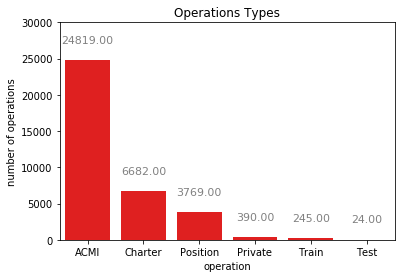

In [9]:

###############################################################################
###############################################################################
#********Exploratory Data Analysis*********************************************
###############################################################################
###############################################################################
import matplotlib.pyplot as plt
import seaborn as sns
#count/sandard deviation,mean,min, max, percentiles per categories
statsorig = dffinal.describe(include='all')
print(statsorig)
# revelate the most important categorical 

#bar chart Type of Operation

count_operation = dffinal["CorrectOperationType"].value_counts()

x_axis=count_operation.index
y_axis=dffinal["CorrectOperationType"].value_counts()

g=sns.barplot(x_axis, y_axis, color="red")
ax=g
plt.title('Operations Types')
plt.xlabel('operation')
plt.ylabel('number of operations')
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,30000)


In [85]:
#Analyses per all variable charter per moth
dffinal[dffinal['CorrectOperationType'] == 'Charter'].groupby('Month').sum()



,Passengers,Year,Day,Weekday_num,HEstimTD,mtsEstimTD,HActualTD,mtsActualTD,HEstimTA,mtsEstimTA,...,HArrivalDiff,mtsArrivalDiff,mtstotaisArrivalDiff,HAirborn,mtsAirborn,mtstotaisAirborn,HBlockH,mtsBlockH,mtstotaisBlockH,Airline_anon
Month,,,,,,,,,,,,,,,,,,,,,
1,45974,1075463,8315,1261,6027,11755,6007,15808,6210,13670,...,9720,11066,21656,140400,14873,155273,152340,16276,168616,9376.0
2,28706,831657,6378,978,4715,9385,4653,12362,4677,10514,...,6660,9009,16547,108900,11465,120365,118440,12083,130523,7072.0
3,38328,1010726,8309,1289,5420,10500,5291,15346,5533,12015,...,8760,9527,19545,134640,14645,149285,146880,14734,161614,6985.0
4,51699,1236319,9192,1724,6619,13228,6570,17027,7367,13659,...,9900,12689,23237,147300,17018,164318,159420,18921,178341,7394.0
5,43088,1214323,9456,1705,6601,14134,6419,17844,7241,14182,...,10440,11939,23295,135180,16154,151334,146460,19071,165531,7959.0
6,51422,1306524,10289,1794,6880,16942,6950,19042,8070,16185,...,6060,13017,20021,167520,17413,184933,179880,20392,200272,8123.0
7,35460,986522,7979,1355,5371,12410,5293,13734,6169,12630,...,6180,9689,16689,138960,13428,152388,149760,14391,164151,6577.0
8,29849,805315,6583,1019,4317,10970,4246,11337,4937,10495,...,9600,7978,17980,116040,10119,126159,123120,12388,135508,4950.0
9,36642,1029141,8457,1212,5518,12360,5384,14866,6244,12506,...,5640,9083,15881,120900,14242,135142,132480,14741,147221,7296.0


In [86]:
#Analyses per all variable ACMI per moth
dffinal[dffinal['CorrectOperationType'] == 'ACMI'].groupby('Month').sum()



,Passengers,Year,Day,Weekday_num,HEstimTD,mtsEstimTD,HActualTD,mtsActualTD,HEstimTA,mtsEstimTA,...,HArrivalDiff,mtsArrivalDiff,mtstotaisArrivalDiff,HAirborn,mtsAirborn,mtstotaisAirborn,HBlockH,mtsBlockH,mtstotaisBlockH,Airline_anon
Month,,,,,,,,,,,,,,,,,,,,,
1,258946,3355770,26269,5103,22891,39617,22032,46700,18554,47077,...,55080,37193,92949,567420,48969,616389,619020,46932,665952,108596.0
2,208050,2860224,20326,4253,19498,33354,19121,40000,15931,37779,...,35220,30816,67440,468960,41582,510542,512100,39247,551347,91251.0
3,249762,3347844,25682,5094,22303,37227,21635,45725,19018,46563,...,37020,34815,73269,528180,47319,575499,575820,47489,623309,102519.0
4,198385,2596310,19808,4107,16758,26482,16525,35630,14913,39009,...,49320,28843,79147,425640,35074,460714,460920,37914,498834,92721.0
5,238263,3007567,24399,4692,18585,33029,18074,41512,16904,45264,...,31380,31395,63229,494700,43467,538167,538680,42605,581285,111358.0
6,309059,4323325,37242,6639,26178,48498,25957,58678,23996,59812,...,65520,49838,116550,660720,65079,725799,728520,59912,788432,137615.0
7,541169,7268698,57435,10935,42780,88201,42654,97923,42655,103395,...,84960,79802,166392,1040220,108791,1149011,1151820,100152,1251972,208991.0
8,570078,7608867,60518,11465,43540,90864,43557,102317,44378,104136,...,114060,84657,199495,1027920,113330,1141250,1144380,104870,1249250,235845.0
9,337480,5067854,34849,7748,30712,56049,30796,70102,29906,69696,...,85680,55351,142059,667020,75286,742306,741720,70131,811851,162194.0


In [87]:
#Analyses per month number of flight per operation type
dffinal.groupby(['Month', 'CorrectOperationType'])['Date'].count()



Month  CorrectOperationType
1      ACMI                    1666
       Charter                  534
       Position                 225
       Private                   32
       Test                       2
                               ... 
12     Charter                  627
       Position                 359
       Private                   39
       Test                       2
       Train                     10
Name: Date, Length: 71, dtype: int64

In [88]:
#Analyses per month number of flight per operation type
dffinal.groupby(['Day', 'CorrectOperationType'])['Date'].count()



Day  CorrectOperationType
1    ACMI                    841
     Charter                 210
     Position                141
     Private                  11
     Test                      1
                            ... 
31   Charter                 125
     Position                 84
     Private                   7
     Test                      2
     Train                     9
Name: Date, Length: 172, dtype: int64

In [91]:
#Operations type and stations
optype_station=dffinal.groupby(['Departure','CorrectOperationType']).sum()
print(optype_station)


                                Passengers   Year  Month  Day  Weekday_num  \
Departure CorrectOperationType                                               
AAE       ACMI                         586  16096     82   69           19   
AAL       ACMI                           0   2016      6   14            1   
AAN       ACMI                           0   2017      3   24            4   
          Charter                       59   4031     23   33            5   
ABC       Charter                        0   4031     24   13            8   
...                                    ...    ...    ...  ...          ...   
ZQW       Charter                      206   2012      9    4            1   
          Private                        5   2018      6   10            6   
ZRH       ACMI                         429  20152     65  112           13   
          Charter                        0   6036     33   33            9   
          Position                       0   6046     16   63   

In [92]:
#Number of operators
print(dffinal['Airline'].value_counts().count())

117


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0E6404388>,
      dtype=object)

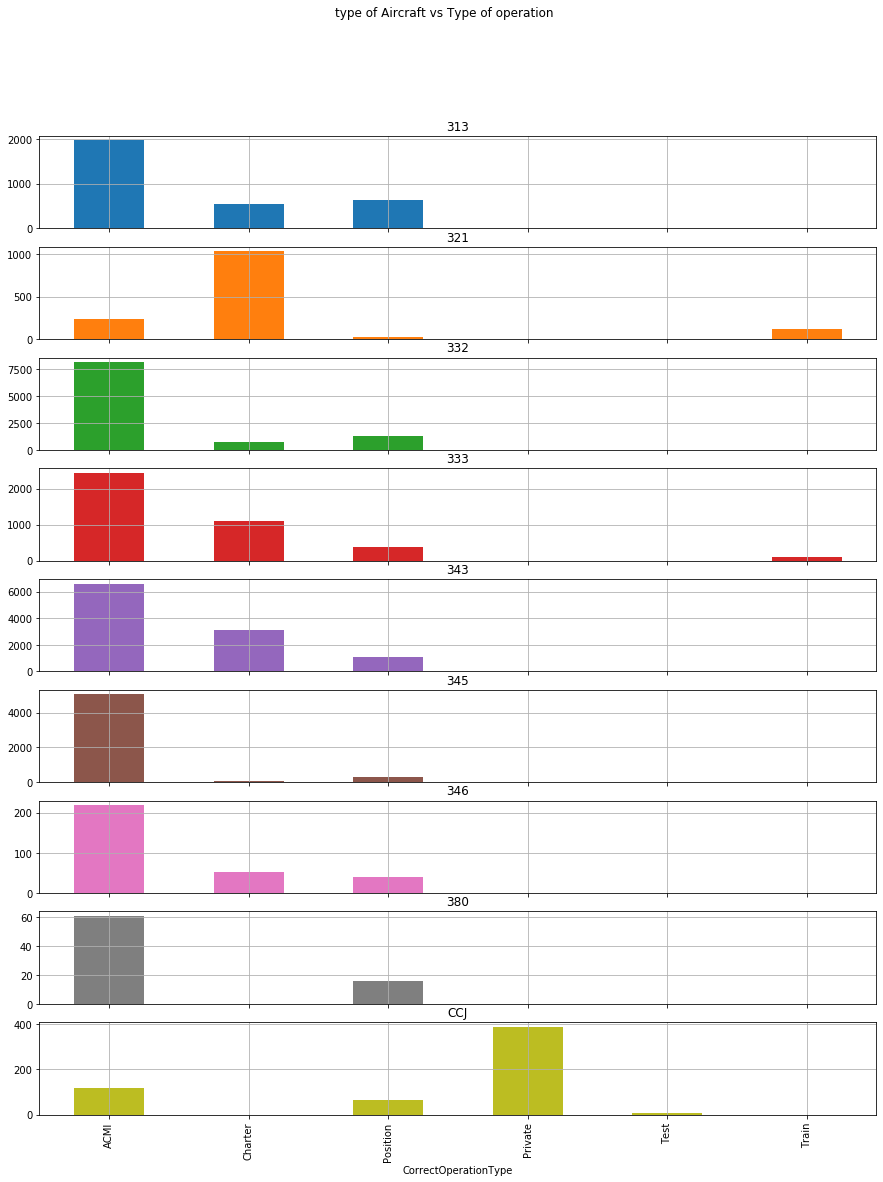

In [10]:
# Subplot with type of Aircraft vs type of operation
dfsubplot = dffinal.groupby(['CorrectOperationType','AircraftType']).size().unstack(fill_value=0)
dfsubplot.plot.bar(subplots=True,title='type of Aircraft vs Type of operation',figsize=(15, 18),sharex=True,grid=True,legend= False)



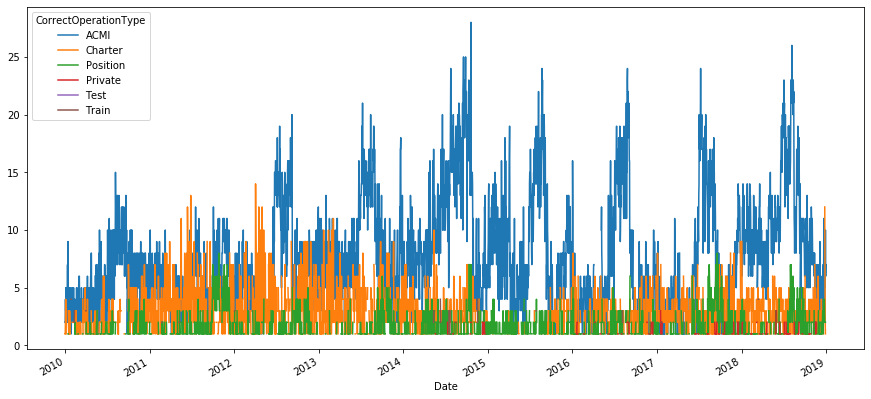

In [11]:
#plot between type of operation and type of aircraft per date
#plot data
fig, ax = plt.subplots(figsize=(15,7))
dffinal.groupby(['Date','CorrectOperationType']).count()['AircraftType'].unstack().plot(ax=ax)


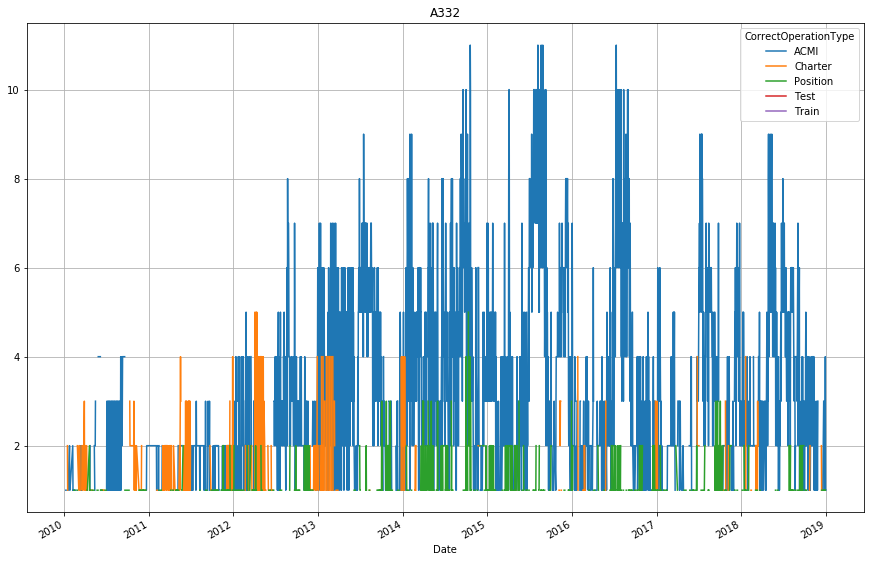

In [20]:
#plot between type of operation and type of aircraft per date
#plot data
    
dfplot0=dffinal[dffinal['AircraftType'] == '332']
dfplot1=dfplot0[['Date','AircraftType','CorrectOperationType']]
fig, ax = plt.subplots(figsize=(15,10))
dfplot1.groupby(['Date','CorrectOperationType']).count()['AircraftType'].unstack().plot(grid=True,legend= True,ax=ax,title='A332')


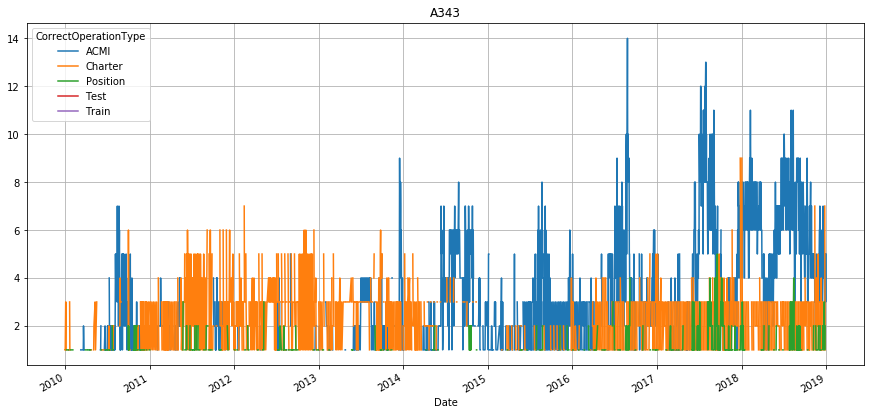

In [21]:
dfplot2=dffinal[dffinal['AircraftType'] == '343']
dfplot3=dfplot2[['Date','AircraftType','CorrectOperationType']]
fig, ax = plt.subplots(figsize=(15,7))
dfplot3.groupby(['Date','CorrectOperationType']).count()['AircraftType'].unstack().plot(grid=True,ax=ax, title='A343')


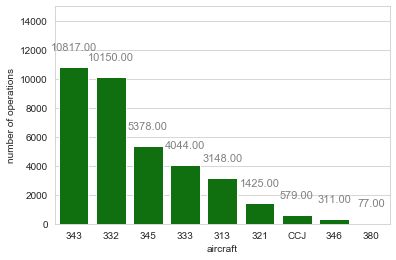

In [58]:
#plot count aircraft flights
#plot data


count_operation =  (dffinal['AircraftType']).value_counts()

x_axis=count_operation.index
y_axis=(dffinal['AircraftType']).value_counts()

g=sns.barplot(x_axis, y_axis, color="green")
ax=g
plt.xlabel('aircraft')
plt.ylabel('number of operations')
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,15000)



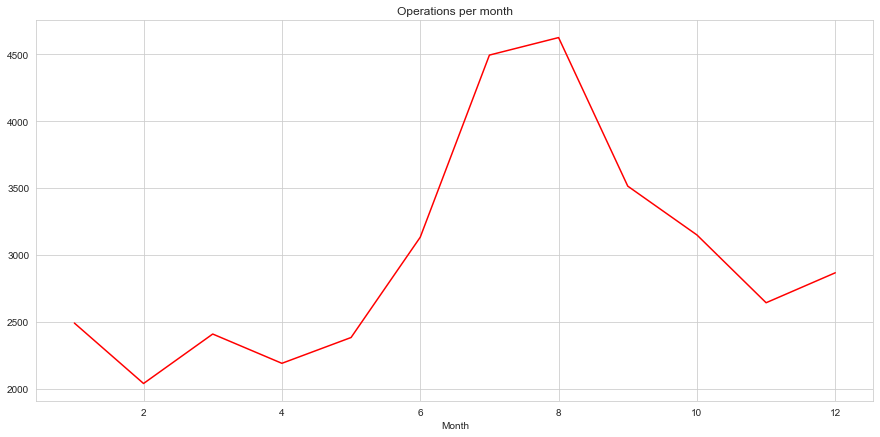

In [66]:
#Number of operations per month
fig, ax = plt.subplots(figsize=(15,7))
dffinal.groupby('Month').count()['CorrectOperationType'].plot(ax=ax, title='Operations per month', color='red')



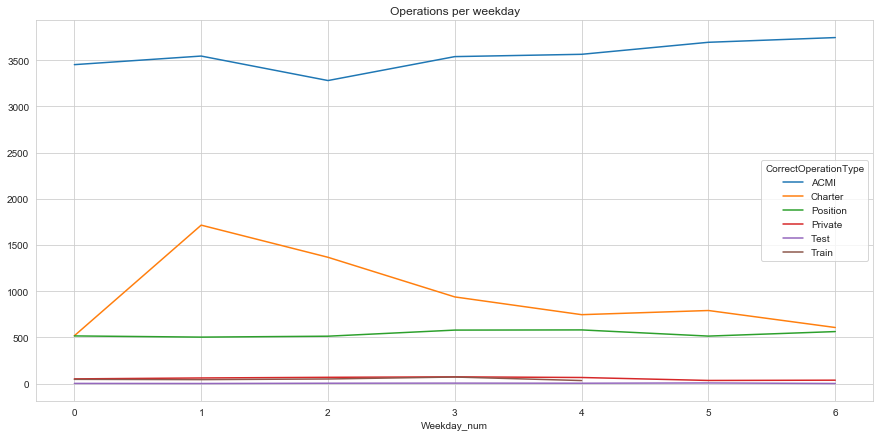

In [71]:
#Operations per week
fig, ax = plt.subplots(figsize=(15,7))
dffinal.groupby(['Weekday_num','CorrectOperationType']).count()['Day'].unstack().plot(ax=ax,legend='Weekday', title='Operations per weekday')


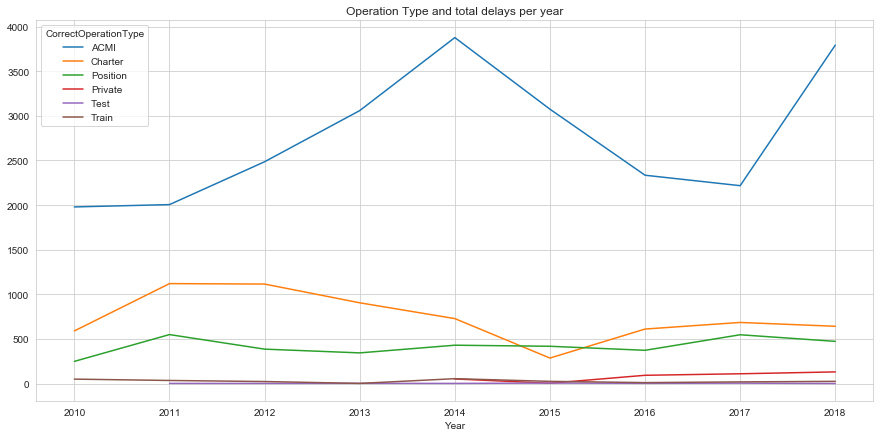

In [84]:
#line chart Operation Type and total delays per year
fig, ax = plt.subplots(figsize=(15,7))
dffinal.groupby(['Year','CorrectOperationType']).count()['mtstotaisArrivalDiff'].unstack().plot(ax=ax,title='Operation Type and total delays per year')


Text(0.5, 1.0, 'Boxplot Year vs AircraftType')

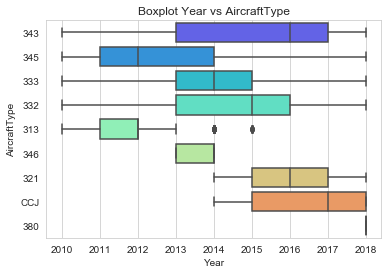

In [34]:

#boxplot per Year and aircraft
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x='Year',y='AircraftType',data=dffinal,palette='rainbow').set_title('Boxplot Year vs AircraftType')


Text(0.5, 1.0, 'Boxplot Month vs AircraftType')

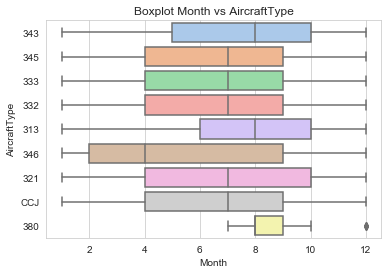

In [35]:
#boxplot per month and aircraft
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x='Month',y='AircraftType',data=dffinal,palette='pastel').set_title('Boxplot Month vs AircraftType')

Text(0.5, 1.0, 'Boxplot weekday vs AircraftType')

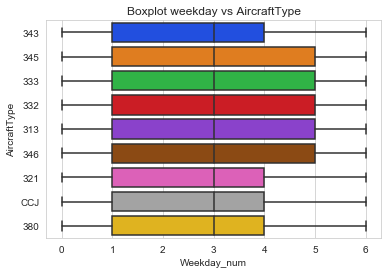

In [36]:
#boxplot per weekday and aircraft
sns.set_style("whitegrid")
sns.boxplot(x='Weekday_num',y='AircraftType',data=dffinal,palette='bright').set_title('Boxplot weekday vs AircraftType')


Text(0.5, 1.0, 'Boxplot Month vs Operation Type')

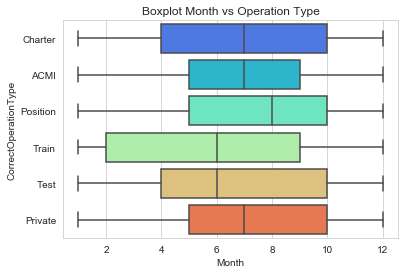

In [68]:
#boxplot per month and operation type
sns.set_style("whitegrid")
sns.boxplot(x='Month',y='CorrectOperationType',data=dffinal,palette='rainbow').set_title('Boxplot Month vs Operation Type')

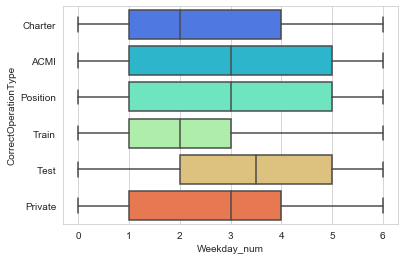

In [72]:
#boxplot per weekday and operation type
sns.set_style("whitegrid")
sns.boxplot(x='Weekday_num',y='CorrectOperationType',data=dffinal,palette='rainbow')

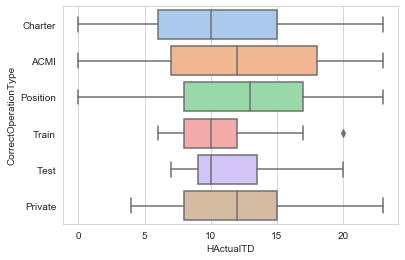

In [73]:
#boxplot per hour departure and operation type
sns.set_style("whitegrid")
sns.boxplot(x='HActualTD',y='CorrectOperationType',data=dffinal,palette='pastel')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0F58D4888>,
      dtype=object)

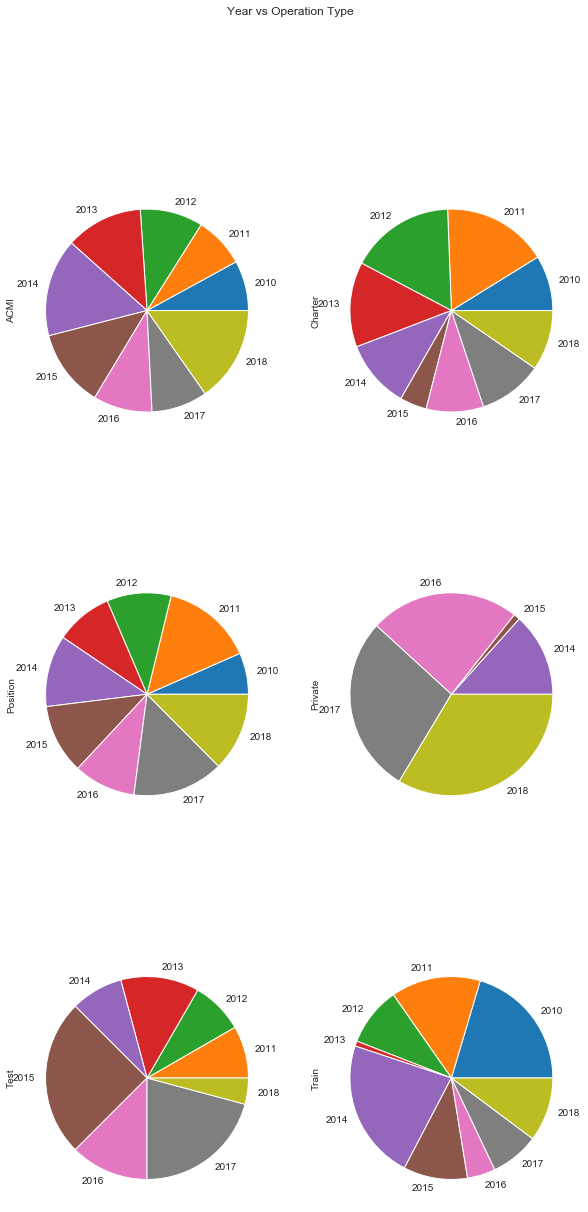

In [82]:
#pie chart Operation Type and year
dfpie = dffinal.groupby(['Year','CorrectOperationType']).size().unstack(fill_value=0)
dfpie.plot.pie(subplots=True,layout=(3,2),figsize=(10, 20),title='Year vs Operation Type',legend= False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0F5EEDDC8>,
      dtype=object)

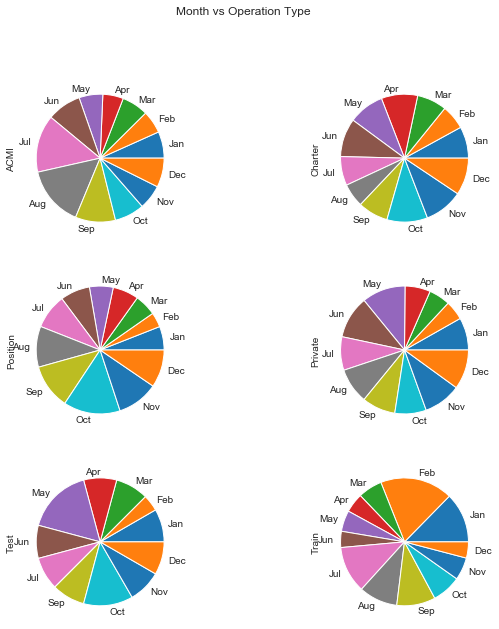

In [83]:
#pie chart Operation Type and month
dfpie1 = dffinal.groupby(['Month','CorrectOperationType']).size().unstack(fill_value=0)
dfpie1=dfpie1.rename({1:'Jan',2: 'Feb',3: 'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},axis='index')
dfpie1.plot.pie(subplots=True,layout=(3,2),figsize=(10, 10),title='Month vs Operation Type',legend= False)


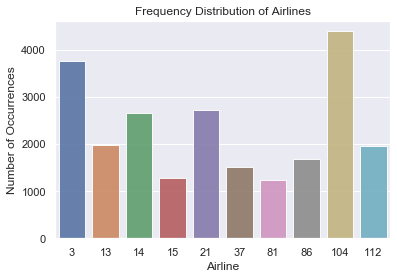

In [109]:
#Number of flights per each Airlines 
carrier_count = dffinal['Airline_anon'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9).set_title('Frequency Distribution of Airlines')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.show()

In [ ]:
#Top of departure stations
dffinal['Departure'].value_counts().head(10)

In [98]:
#count flights per operation type
dffinal['CorrectOperationType'].value_counts()

ACMI        24819
Charter      6682
Position     3769
Private       390
Train         245
Test           24
Name: CorrectOperationType, dtype: int64

In [ ]:
# transform 3 variables into categoric
dffinal['CorrectOperationType'] = dffinal['CorrectOperationType'].astype('category')
dffinal['Departure'] = dffinal['Departure'].astype('category')
dffinal['Airline'] = dffinal['Airline'].astype('category')

#most common station for each airlines
dfdepart_airline=dffinal.groupby(['Departure','Airline']).size().reset_index(name='Freq')
dfdepart_airline.sort_values(by=['Departure'])
df1dfdepart_airline=dfdepart_airline.sort_values(by='Freq', ascending=False).head(10)
viz=dfdepart_airline.sort_values(by='Freq', ascending=False).head(10)
viz

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}


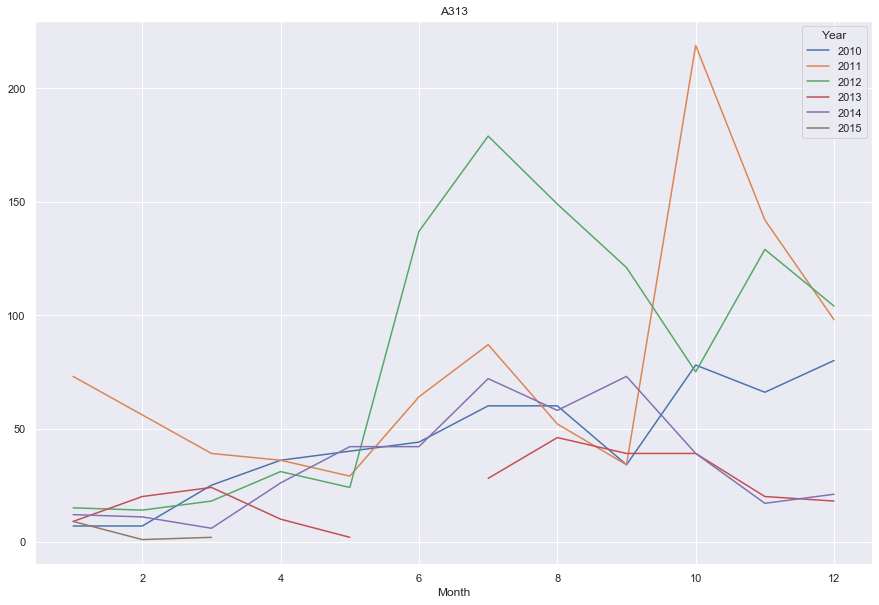

In [120]:
#TRANSFORM DATA TO BE WORKABLE AND OTHER EXPLORATION 
dffinalcopy=dffinal

#transform categorical to numeric
from sklearn.preprocessing import LabelEncoder

#maping enconding variables
lb_make = LabelEncoder()

lb_make.fit(dffinalcopy['AircraftType'])
le_name_mapping = dict(zip(lb_make.classes_, lb_make.transform(lb_make.classes_)))
print(le_name_mapping)
#{'313': 0, '321': 1, '332': 2, '333': 3, '343': 4, '345': 5, '346': 6, 'CCJ': 7}

dffinalcopy['AircraftType'] = lb_make.fit_transform(dffinalcopy['AircraftType'])
dffinalcopy['AircraftReg'] = lb_make.fit_transform(dffinalcopy['AircraftReg'])
dffinalcopy['Departure'] = lb_make.fit_transform(dffinalcopy['Departure'])
dffinalcopy['Arrival'] = lb_make.fit_transform(dffinalcopy['Arrival'])
dffinalcopy['stateflightDepartDiff'] = lb_make.fit_transform(dffinalcopy['stateflightDepartDiff'])
dffinalcopy['stateflightArrivalDiff'] = lb_make.fit_transform(dffinalcopy['stateflightArrivalDiff'])
dffinalcopy['CorrectOperationType'] = lb_make.fit_transform(dffinalcopy['CorrectOperationType'])

#plot per aircraft per year/month
dfp0=dffinalcopy[dffinalcopy['AircraftType'] == 0]

fig0, ax0 = plt.subplots(figsize=(15,10))
dfz=dfp0.groupby(['Month','Year']).count()['AircraftType'].unstack().plot(ax=ax0,title='A313')


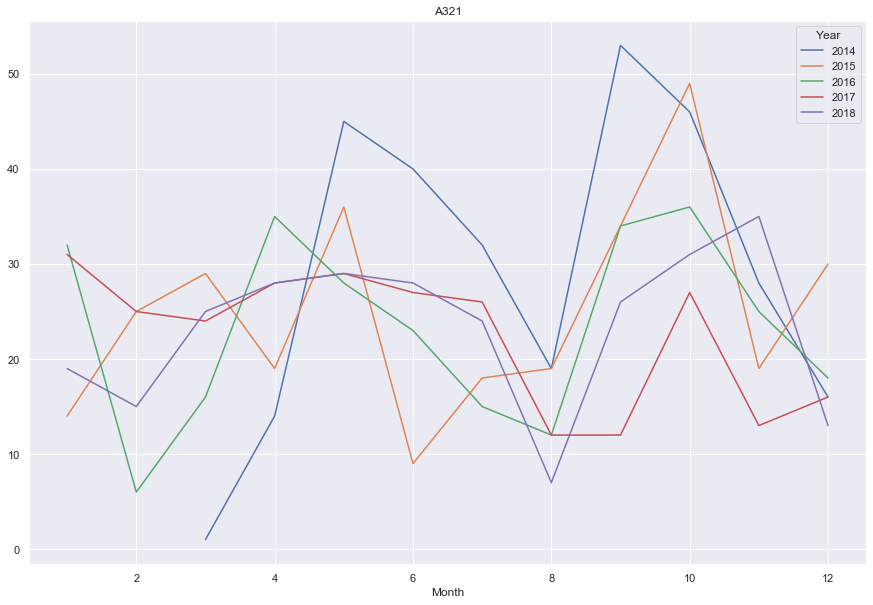

In [124]:
dfp1=dffinalcopy[dffinalcopy['AircraftType'] == 1]
fig1, ax1 = plt.subplots(figsize=(15,10))
dfp1.groupby(['Month','Year']).count()['AircraftType'].unstack().plot(ax=ax1,title='A321')


In [105]:
# CORRELATION MATRIX
corr=dffinalcopy.corr()
print(corr)


                        AircraftType  AircraftReg  Departure   Arrival  \
AircraftType                1.000000    -0.199820   0.082394  0.083793   
AircraftReg                -0.199820     1.000000  -0.074259 -0.073514   
Departure                   0.082394    -0.074259   1.000000 -0.088697   
Arrival                     0.083793    -0.073514  -0.088697  1.000000   
Passengers                  0.006767    -0.076372   0.044307  0.079917   
Year                        0.117431    -0.173251   0.024020  0.023898   
Month                      -0.054796    -0.001018  -0.021942 -0.022663   
Day                        -0.013646     0.015732   0.007253  0.007517   
Weekday_num                -0.043260    -0.020583   0.005016 -0.027166   
HEstimTD                    0.063808    -0.081885  -0.026317  0.056583   
mtsEstimTD                 -0.018394    -0.004751   0.042453  0.000928   
HActualTD                   0.045859    -0.058414  -0.034558  0.045231   
mtsActualTD                 0.008624  

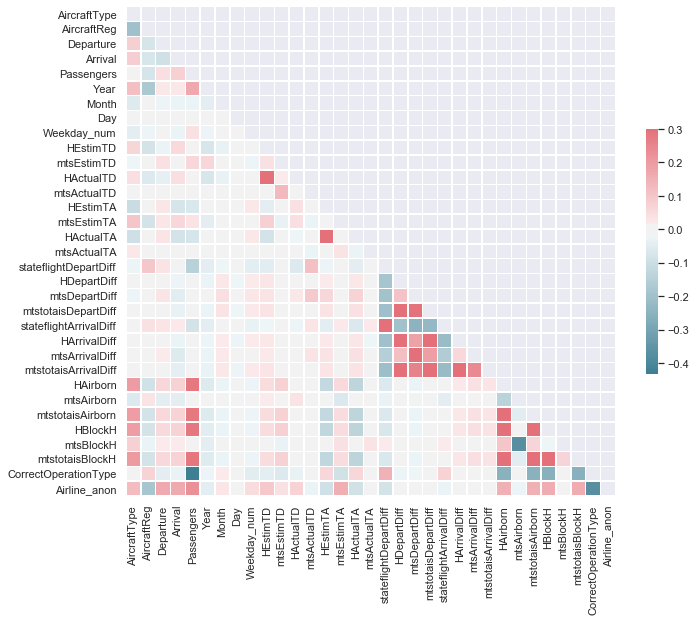

In [106]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [107]:
#CLEAN DATASET OF REPEATED DATA
dffinalcopy1=dffinalcopy.drop(['Date','flightN','OperationType','Weekday','Airline','EstimTD','ActualTA','ActualTD','EstimTA','DepartDiff','ArrivalDiff','AirbornH','BlockH','mtsBlockH','HBlockH','mtsAirborn','HAirborn','mtsArrivalDiff','HArrivalDiff','mtsDepartDiff','HDepartDiff'], axis=1).copy()
dffinalcopy1_target=dffinalcopy[('CorrectOperationType')]

#variable summary with transformed new data
statnew=dffinalcopy.describe().transpose()
print(statnew)
#mode
statmode=dffinalcopy1.mode()
print(statmode)
#median
statmedian=dffinalcopy1.median()
print(statmedian)

                          count         mean         std     min     25%  \
AircraftType            35929.0     3.090874    1.623697     0.0     2.0   
AircraftReg             35929.0    15.690445    5.944576     0.0    13.0   
Departure               35929.0   277.496117  159.759369     0.0   119.0   
Arrival                 35929.0   277.953018  159.572769     0.0   118.0   
Passengers              35929.0   117.358067  111.916788     0.0     0.0   
Year                    35929.0  2014.187175    2.525489  2010.0  2012.0   
Month                   35929.0     6.910184    3.218346     1.0     4.0   
Day                     35929.0    15.727518    8.884227     1.0     8.0   
Weekday_num             35929.0     2.976788    1.972229     0.0     1.0   
HEstimTD                35929.0    12.182610    6.474985     0.0     7.0   
mtsEstimTD              35929.0    22.642796   18.294496     0.0     5.0   
HActualTD               35929.0    12.029837    6.586209     0.0     7.0   
mtsActualTD 

In [125]:

###############################################################################
###############################################################################
#**************PRINCIPAL COMPONENT ANALYSIS************************************
###############################################################################
###############################################################################


from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn import preprocessing

#Normalizing Data
x = dffinalcopy1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dffinalcopy1_normalized = pd.DataFrame(x_scaled)

#Covariance Matrix
import numpy as np
print('NumPy covariance matrix: \n%s' %np.cov(dffinalcopy1_normalized.T))

#Eigenvectors and Eigenvalues
cov_mat = np.cov(dffinalcopy1_normalized.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#Correlation Matrix Normalized (the normalized covariance matrix)
cor_mat1 = np.corrcoef(dffinalcopy1_normalized.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#SVD to confirm the results
#u,s,v = np.linalg.svd(dffinalcopy1_normalized.T)


#The eigenvectors with the lowest eigenvalues bear the least information about the distribution 
#of the data those are the ones can be dropped
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
#explained variance tells us how much information (variance) can be attributed 
#to each of the principal components    

#Fitting the PCA algorithm with our Data
pca = PCA().fit(dffinalcopy1_normalized)

print(pca.explained_variance_ratio_)


NumPy covariance matrix: 
[[ 4.11936275e-02 -8.61026406e-03  4.13565875e-03  4.20098342e-03
   3.29128325e-04  7.52410837e-03 -3.25390385e-03 -8.20199055e-04
  -2.88610285e-03  3.64584511e-03 -1.15760755e-03  2.66529185e-03
   5.27027195e-04 -6.05255576e-03  6.37289924e-03 -5.42046396e-03
   1.55001767e-03 -1.84261515e-03 -9.25058300e-05  7.65297910e-04
  -6.45914170e-05  7.50158294e-03  7.77657422e-03 -2.68522168e-05
   8.36015991e-03]
 [-8.61026406e-03  4.50739606e-02 -3.89891684e-03 -3.85528528e-03
  -3.88576594e-03 -1.16116711e-02 -6.32518502e-05  9.89129615e-04
  -1.43643253e-03 -4.89414863e-03 -3.12769545e-04 -3.55132094e-03
   1.02931846e-03  2.59876162e-04 -5.21719341e-03 -1.26624586e-04
   1.48201970e-04  8.85181592e-03  2.18188473e-05  3.80994263e-03
   4.56650492e-05 -3.32252911e-03 -3.39431155e-03  2.47239973e-03
  -1.30231852e-02]
 [ 4.13565875e-03 -3.89891684e-03  6.11600227e-02 -5.41834700e-03
   2.62590908e-03  1.87527624e-03 -1.58760319e-03  5.31216643e-04
   4.0776974

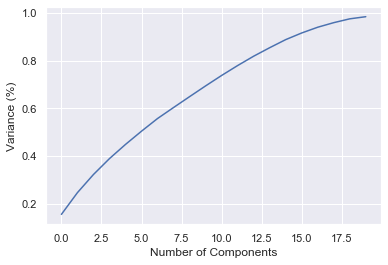

[0.29628599 0.17512867 0.1460335  0.12812594 0.11416417 0.10666553
 0.1020043  0.08862927 0.08757148 0.08652837 0.08414817 0.07982844
 0.07531446 0.06843687 0.06511865 0.05359907 0.04633304 0.03678085
 0.03081275 0.01720476]
[0.15447385 0.24578022 0.32191732 0.38871801 0.44823948 0.50385141
 0.55703312 0.60324153 0.64889844 0.69401151 0.73788362 0.77950356
 0.81877007 0.85445082 0.88840156 0.91634636 0.9405029  0.95967923
 0.975744   0.984714  ]


In [129]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()


pca = PCA(n_components=20,svd_solver='auto')
dataset_pca = pca.fit_transform(dffinalcopy1_normalized)
print(pca.explained_variance_)
print (pca.explained_variance_ratio_.cumsum())
# 17 component, explains 95,5% of the model